# Chapter4. Dimensionality Reduction PCA

> - LDA: Linear Discrimiant Analysis
> - NMF: Non-negative Matrix Factorization
> - SVD: Singluar Value Decomposition
> - ICA: Independent Component Analysis

## Stastics Descriptive with Pandas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


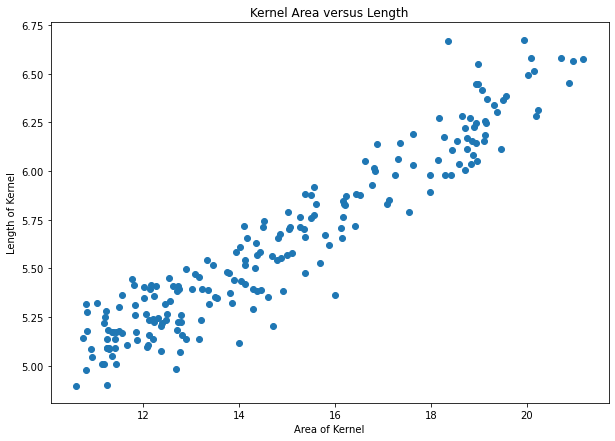

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(df['A'], df['LK'])
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Kernel Area versus Length')
plt.show()

In [5]:
df.mean()

A     14.847524
LK     5.628533
dtype: float64

In [6]:
np.mean(df.values, axis=0)

array([14.84752381,  5.62853333])

In [7]:
df.std()

A     2.909699
LK    0.443063
dtype: float64

In [8]:
np.std(df.values, axis=0)

array([2.90276331, 0.44200731])

In [9]:
df.var()

A     8.466351
LK    0.196305
dtype: float64

In [10]:
np.var(df.values, axis=0)

array([8.42603482, 0.19537046])

In [11]:
df.cov()

,A,LK
A,8.466351,1.224704
LK,1.224704,0.196305


In [12]:
np.cov(df.values.T)

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

## Eigenvalues & Eigenvectors

In [14]:
df = pd.read_csv('data/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [15]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


### numpy `linalg.eig` 함수 사용

In [16]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(df.T))

In [17]:
eigenvalues

array([8.64390408, 0.01875194])

In [19]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues

array([8.64390408, 8.66265602])

In [20]:
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.99783531, 1.        ])

In [21]:
eigenvectors

array([[ 0.98965371, -0.14347657],
       [ 0.14347657,  0.98965371]])

In [22]:
eigenvectors.shape

(2, 2)

In [23]:
P = eigenvectors[0]
P

array([ 0.98965371, -0.14347657])

## PCA Scratch

In [24]:
df = pd.read_csv('data/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [25]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [26]:
data = np.cov(df.values.T)
# The transpose is required to ensure the covariance matrix is 
#based on features, not samples data
data

array([[8.46635078, 1.22470367],
       [1.22470367, 0.19630525]])

### Eigenvalues, Eigenvectors 계산

In [27]:
eigenvectors, eigenvalues, _ = np.linalg.svd(data, full_matrices=False)

In [28]:
eigenvalues

array([8.64390408, 0.01875194])

In [29]:
eigenvectors

array([[-0.98965371, -0.14347657],
       [-0.14347657,  0.98965371]])

In [30]:
eigenvalues = np.cumsum(eigenvalues)
eigenvalues /= eigenvalues.max()
eigenvalues

array([0.99783531, 1.        ])

In [31]:
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

### Eigenvectors로 PCA(Priciple Component) 만들기

In [32]:
x_t_p = P.dot(df.values.T)
x_t_p

array([-15.92897116, -15.52291615, -14.90128612, -14.46067667,
       -16.78480139, -15.00398523, -15.33617323, -14.74165693,
       -17.32640496, -17.11412321, -15.92194081, -14.66506721,
       -14.52665917, -14.42353632, -14.3843806 , -15.20679083,
       -14.57971203, -16.32066179, -15.29470516, -13.33820381,
       -14.82528704, -14.75600459, -16.52175236, -12.68660391,
       -15.68528813, -16.85939248, -13.65934747, -13.38224443,
       -14.75901759, -14.10225923, -13.8063641 , -16.15573066,
       -14.7644764 , -14.59708943, -15.71382658, -16.77232562,
       -16.86828468, -17.74004081, -15.45837846, -14.9065981 ,
       -14.167224  , -14.12806828, -13.76102551, -16.18284438,
       -15.75412342, -14.42855131, -16.01904099, -15.63407368,
       -15.43255602, -15.52091417, -15.08201975, -16.43082168,
       -15.16005093, -14.97143278, -15.19347093, -15.69259874,
       -15.08344448, -15.53811128, -16.03323847, -12.72490211,
       -12.02037609, -11.81713337, -12.96040699, -13.85

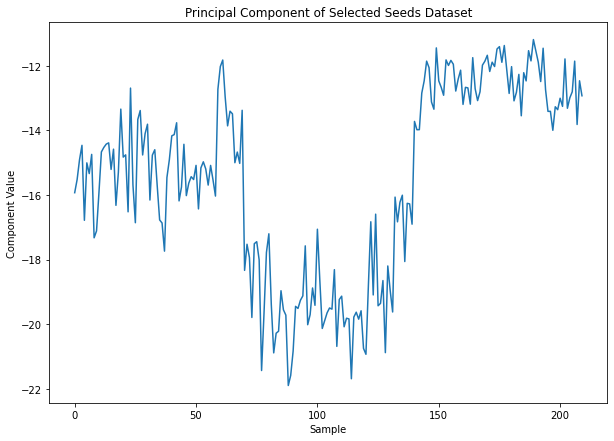

In [33]:
plt.figure(figsize=(10, 7))
plt.plot(x_t_p)
plt.title('Principal Component of Selected Seeds Dataset')
plt.xlabel('Sample')
plt.ylabel('Component Value')
plt.show()

## Scikit-learn으로 PCA 구현

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [35]:
df = pd.read_csv('data/Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [36]:
df = df[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


### PCA Basic

In [37]:
model = PCA()
model.fit(df.values)

PCA()

In [38]:
model.explained_variance_ratio_

array([0.99783531, 0.00216469])

In [39]:
model.components_

array([[ 0.98965371,  0.14347657],
       [-0.14347657,  0.98965371]])

### PCA `n_components=1`
> `n_compoemen` = eigenvectors/eigenvalues = 1


In [40]:
model = PCA(n_components=1)

In [41]:
model.fit(df.values)

PCA(n_components=1)

In [42]:
data_t = model.fit_transform(df.values)

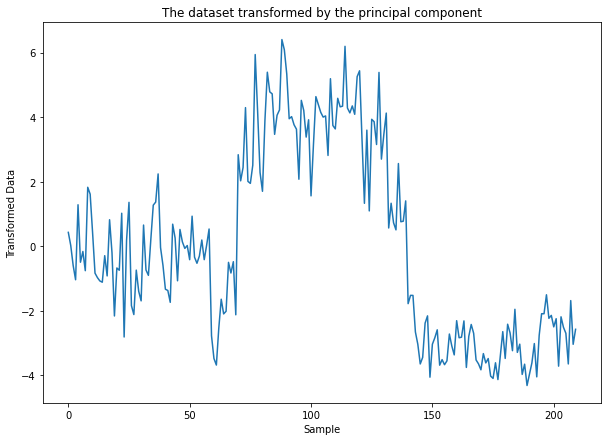

In [43]:
plt.figure(figsize=(10, 7))
plt.plot(data_t)
plt.xlabel('Sample')
plt.ylabel('Transformed Data')
plt.title('The dataset transformed by the principal component')
plt.show()

## Visualization of Manual PCA

In [44]:
df = pd.read_csv('data/Seed_Data.csv')[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


In [45]:
means = np.mean(df.values, axis=0)
means

array([14.84752381,  5.62853333])

In [46]:
data = df.values - means
data

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [47]:
eigenvectors, eigenvalues, _ = np.linalg.svd(np.cov(data.T), full_matrices=False)
P = eigenvectors[0]
P

array([-0.98965371, -0.14347657])

In [48]:
data_transformed = P.dot(data.T)

In [49]:
P = P.reshape((-1, 1))

In [51]:
# Inverted matrix
P_transformed = np.linalg.pinv(P)
P_transformed

array([[-0.98965371, -0.14347657]])

In [52]:
data_transformed = data_transformed.reshape((-1, 1))

In [53]:
data_restored = data_transformed.dot(P_transformed)
data_restored

array([[ 4.23078358e-01,  6.13364376e-02],
       [ 2.12245047e-02,  3.07705530e-03],
       [-5.93973963e-01, -8.61122915e-02],
       [-1.03002474e+00, -1.49329425e-01],
       [ 1.27005392e+00,  1.84128026e-01],
       [-4.92337409e-01, -7.13773752e-02],
       [-1.63586316e-01, -2.37161785e-02],
       [-7.51951584e-01, -1.09015341e-01],
       [ 1.80605390e+00,  2.61835450e-01],
       [ 1.59596848e+00,  2.31377993e-01],
       [ 4.16120744e-01,  6.03277467e-02],
       [-8.27748884e-01, -1.20004171e-01],
       [-9.64724918e-01, -1.39862483e-01],
       [-1.06678082e+00, -1.54658196e-01],
       [-1.10553143e+00, -1.60276124e-01],
       [-2.91630094e-01, -4.22795227e-02],
       [-9.12220950e-01, -1.32250639e-01],
       [ 8.10716440e-01,  1.17534866e-01],
       [-2.04625352e-01, -2.96658760e-02],
       [-2.14088417e+00, -3.10377985e-01],
       [-6.69186735e-01, -9.70163791e-02],
       [-7.37752372e-01, -1.06956788e-01],
       [ 1.00972647e+00,  1.46386653e-01],
       [-2.

In [54]:
data_restored += means

## Visualization transformed datasets

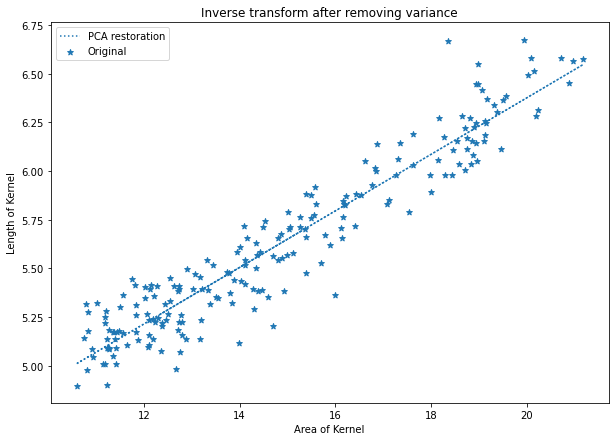

In [55]:
plt.figure(figsize=(10, 7))
plt.plot(data_restored[:,0], data_restored[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

In [56]:
P = eigenvectors
data_transformed = P.dot(data.T)

In [57]:
data_transformed = data_transformed.T

In [58]:
data_restored = data_transformed.dot(P)
data_restored

array([[ 4.12476190e-01,  1.34466667e-01],
       [ 3.24761905e-02, -7.45333333e-02],
       [-5.57523810e-01, -3.37533333e-01],
       [-1.00752381e+00, -3.04533333e-01],
       [ 1.29247619e+00,  2.94666667e-02],
       [-4.67523810e-01, -2.42533333e-01],
       [-1.57523810e-01, -6.55333333e-02],
       [-7.37523810e-01, -2.08533333e-01],
       [ 1.78247619e+00,  4.24466667e-01],
       [ 1.59247619e+00,  2.55466667e-01],
       [ 4.12476190e-01,  8.54666667e-02],
       [-8.17523810e-01, -1.90533333e-01],
       [-9.57523810e-01, -1.89533333e-01],
       [-1.06752381e+00, -1.49533333e-01],
       [-1.10752381e+00, -1.46533333e-01],
       [-2.57523810e-01, -2.77533333e-01],
       [-8.57523810e-01, -5.09533333e-01],
       [ 8.42476190e-01, -1.01533333e-01],
       [-1.47523810e-01, -4.23533333e-01],
       [-2.12752381e+00, -4.02533333e-01],
       [-6.87523810e-01,  2.94666667e-02],
       [-7.37523810e-01, -1.08533333e-01],
       [ 1.03247619e+00, -1.05333333e-02],
       [-2.

In [59]:
data_restored += means

### Visualization the restored in Original datasets

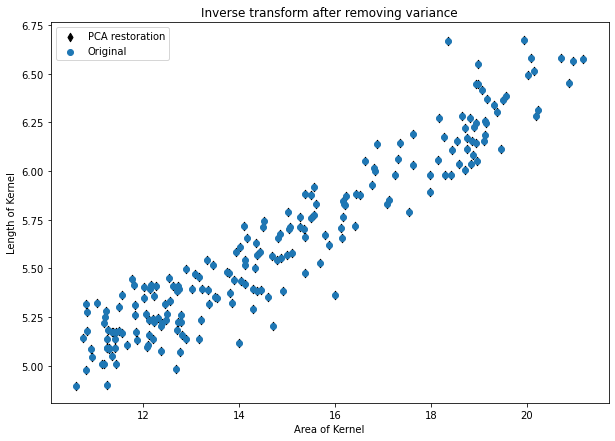

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(data_restored[:,0], data_restored[:,1], marker='d', label='PCA restoration', c='k')
plt.scatter(df['A'], df['LK'], marker='o', label='Original', c='#1f77b4')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

## Visualization Variance Reduction with Scikit-learn

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [62]:
df = pd.read_csv('data/Seed_Data.csv')[['A', 'LK']]
df.head()

,A,LK
0,15.26,5.763
1,14.88,5.554
2,14.29,5.291
3,13.84,5.324
4,16.14,5.658


### Scikit-learn PCA and Visualiztion

In [63]:
model = PCA(n_components=1)
data_p = model.fit_transform(df.values)

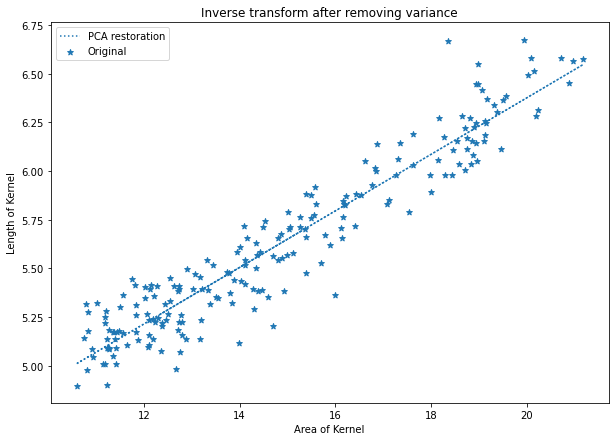

In [64]:
data = model.inverse_transform(data_p);
plt.figure(figsize=(10, 7))
plt.plot(data[:,0], data[:,1], linestyle=':', label='PCA restoration')
plt.scatter(df['A'], df['LK'], marker='*', label='Original')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

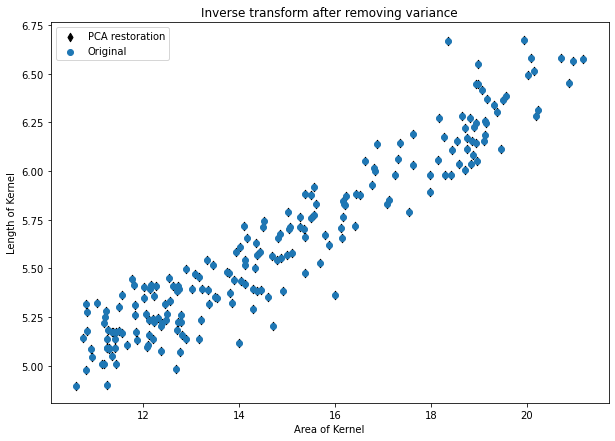

In [65]:
model = PCA()
data_p = model.fit_transform(df.values)
data = model.inverse_transform(data_p)
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], marker='d', label='PCA restoration', c='k')
plt.scatter(df['A'], df['LK'], marker='o', label='Original', c='#1f77b4')
plt.legend()
plt.xlabel('Area of Kernel')
plt.ylabel('Length of Kernel')
plt.title('Inverse transform after removing variance')
plt.show()

## 3D Plots in Matplotlib

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('data/Seed_Data.csv')[['A', 'LK', 'C']]
df.head()

,A,LK,C
0,15.26,5.763,0.8710
1,14.88,5.554,0.8811
2,14.29,5.291,0.9050
3,13.84,5.324,0.8955
4,16.14,5.658,0.9034


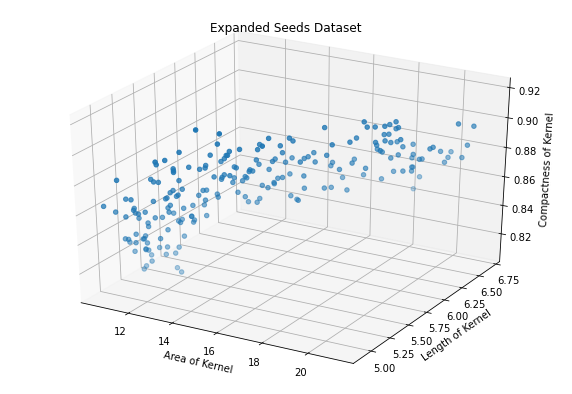

In [68]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d') # Where Axes3D is required

ax.scatter(df['A'], df['LK'], df['C'])
ax.set_xlabel('Area of Kernel')
ax.set_ylabel('Length of Kernel')
ax.set_zlabel('Compactness of Kernel')
ax.set_title('Expanded Seeds Dataset')
plt.show()